

![Image](https://th.bing.com/th/id/AMMS_4b0896e1c3572451d14093065f0c1e61?w=260&h=174&c=7&o=5&pid=1.7)
![Image](https://th.bing.com/th/id/OIP.koULmIorq1ZJrJcwQe8kSQAAAA?pid=Api&w=229&h=137&c=7)
![Image](https://th.bing.com/th/id/OIP.7SIYXAaSosB4RocW5Vog5QHaHC?w=148&h=146&c=7&o=5&pid=1.7)

# Démonstration d'un article intéractif et reproductible

- Interroger le lien entre la campagne d'évaluation HCERES et l'évolution des dépôts HAL

## Par Germano VERA CRUZ


# RESUME 

### Démonstration d'un article interactif dans un article interactif. Bien que principalement démonstratif, nous allons tout de même amorcer une étude de données réelles en lien avec la science ouverte.

### Un article interactif contient 3 types de cellules :

- Cellule : texte avec balisage léger Markdown
- Cellule : code exécutable
- Cellule : résultat de code (affichage de chiffre, tableau, graphique)

### Une cellule a 3 états :

- État : exécuté/affiché
- État : en cours d'exécution (uniquement pour les cellules de code)
- État : édition

### L'objectif de cet article intéractif est de montrer l'intérêt de ces cellules par un exemple d'exploration de données.

## Protocole

Nous souhaitons nous interroger sur le lien pouvant exister entre le nombre de notices déposées sur HAL et les dates d'évaluations HCERES.
Pour celà nous souhaitons obtenir le nombre de notices déposées par an pour un échantillon de laboratoire tiré aléatoirement mais dont les dates 
d'évaluation HCERES sont identiques. Dans cette étude nous nous concentrons autours de la campagne d'évaluation 2016-2017 afin de disposer 
d'observation antérieurs et postérieurs pour évaluer les phénomènes d'accélarations et décélération des dépôts.. 
L'extraction de ces informations peut être réalisé avec le logiciel extract HAL ou directement en réalisant un script ad-hoc réalisant des requêtes s
ur l'API HAL.Dans cet article nous avons choisi la seconde méthode pour maîtriser tous les parmètres et montrer l'intéret d'un article interactif ;-).
Le code d'extraction de données est disponible en Annexe de ce document. Il ne s'agit pas seulement du code source, il est bien directement exécutable dans 
l'article !

## Construction du dataset

 * La cellule ci-dessous est une cellule de code. Pour l'exécuter, il faut la selectionner puis taper sur la combinaison de touche : MAJ+ENTER.

In [9]:
# Encode/Decode Python objects as JSON strings and vice-a-versa
# In Python, the json module provides an API similar to convert in-memory Python objects to a serialized representation 
# known as JavaScript Object Notation (JSON) and vice-a-versa.


import requests
import json
import pandas as pd

def listCollectionToCSV(listCollection, listYears, pathCSV):
    # requets nb depots par an pour les collections choisies
    # années d'interet : 2003 à 2021
    
    
    # liste des colonnes du tableur résultat
    df = pd.DataFrame(columns = ["collectionName","year","nbByProducedDate","nbBySubmittedDate","nbByReleasedDate"])
    
    for collectionName in listCollection:
        for year in listYears:
            
            #apiUrl = "https://api.archives-ouvertes.fr/search/XLIM/?q=producedDateY_i:[2008 TO 2009]"
            
            apiUrl = "https://api.archives-ouvertes.fr/search/"+collectionName+"/?q=producedDateY_i:["+str(year)+" TO "+str(year+1)+"]"
            response = requests.get(apiUrl)
            jr = json.loads(response.text)
            
            nbResProduced = jr['response']['numFound']
            
            apiUrl = "https://api.archives-ouvertes.fr/search/"+collectionName+"/?q=submittedDateY_i:["+str(year)+" TO "+str(year+1)+"]"
            response = requests.get(apiUrl)
            jr = json.loads(response.text)
            nbResSubmitted = jr['response']['numFound']

            apiUrl = "https://api.archives-ouvertes.fr/search/"+collectionName+"/?q=releasedDateY_i:["+str(year)+" TO "+str(year+1)+"]"
            response = requests.get(apiUrl)
            jr = json.loads(response.text)
            nbResReleased = jr['response']['numFound']

            #apiUrl = "https://api.archives-ouvertes.fr/search/XLIM/?q=publicationDateY_i:[2008 TO 2009]"
            apiUrl = "https://api.archives-ouvertes.fr/search/"+collectionName+"/?q=publicationDateY_i:["+str(year)+" TO "+str(year+1)+"]"
            response = requests.get(apiUrl)
            jr = json.loads(response.text)
            nbResPublication = jr['response']['numFound']
             
            dicRow = {'collectionName':collectionName,"year":year,"nbByProducedDate":nbResProduced,"nbBySubmittedDate":nbResSubmitted, "nbByReleasedDate":nbResReleased, "nbByPublicationDate":nbResPublication}
            
            print(dicRow)
            
            df = df.append(dicRow, ignore_index=True)

    return df


### Regénérer les données¶
Les données présentées dans cet articles sont produitent par le code ci-dessous :

In [ ]:
# Un exemple d'extraction d'une seule collection. Ici l'établissement Université de Poitiers
#listLabs = ["UNIV-POITIERS"]
#listYears = range(2003,2021)
#fileDataUP = "https://api.archives-ouvertes.fr/docs/search/?schema=field-types#field-types"

In [10]:
 # Extraction de plusieurs collection

listLabs = ["XLIM","PPRIME","FORELL","CERCA", "IC2MP"]
listYears = range(2003,2021)
fileData = "https://api.archives-ouvertes.fr/docs/search/?schema=field-types#field-types"

dfHal = listCollectionToCSV(listLabs, listYears, fileData)

{'collectionName': 'XLIM', 'year': 2003, 'nbByProducedDate': 182, 'nbBySubmittedDate': 1, 'nbByReleasedDate': 1, 'nbByPublicationDate': 181}
{'collectionName': 'XLIM', 'year': 2004, 'nbByProducedDate': 242, 'nbBySubmittedDate': 4, 'nbByReleasedDate': 4, 'nbByPublicationDate': 241}
{'collectionName': 'XLIM', 'year': 2005, 'nbByProducedDate': 575, 'nbBySubmittedDate': 278, 'nbByReleasedDate': 278, 'nbByPublicationDate': 576}
{'collectionName': 'XLIM', 'year': 2006, 'nbByProducedDate': 893, 'nbBySubmittedDate': 759, 'nbByReleasedDate': 759, 'nbByPublicationDate': 895}
{'collectionName': 'XLIM', 'year': 2007, 'nbByProducedDate': 920, 'nbBySubmittedDate': 842, 'nbByReleasedDate': 840, 'nbByPublicationDate': 921}
{'collectionName': 'XLIM', 'year': 2008, 'nbByProducedDate': 1025, 'nbBySubmittedDate': 711, 'nbByReleasedDate': 710, 'nbByPublicationDate': 1022}
{'collectionName': 'XLIM', 'year': 2009, 'nbByProducedDate': 1125, 'nbBySubmittedDate': 688, 'nbByReleasedDate': 689, 'nbByPublicationDa

### Enregister et exporter les données dans un tableur au format csv

In [ ]:
#dfHal.to_csv('dfHal.csv',index=False)

## Créer un echantillon aléatoire

### Si l'on exécute plusieurs fois la cellule ci-dessous, nous visualisons un nouvel échantillons aléatoire.

In [11]:
dfHal.sample(n=5)

collectionName  year nbByProducedDate nbBySubmittedDate nbByReleasedDate  \
31         PPRIME  2016              361               300              300   
29         PPRIME  2014              271               223              221   
47         FORELL  2014              332                22               22   
2            XLIM  2005              575               278              278   
81          IC2MP  2012              388               270              271   

    nbByPublicationDate  
31                359.0  
29                275.0  
47                335.0  
2                 576.0  
81                389.0

### Description du set de données

- collectionName : variable qualitative nominale (STRING) : le nom d'une collection, ici des laboratoiresyear 
- year : variable temporelle discrète (INTEGER) : une année d'intérêt
- nbByProducedDate : variable quantitative discrète (INTEGER) : le nombre de notice dont l'année de la production du contenu est l'année d'intérêt.
- nbBySubmittedDate : variable quantitative discrète (INTEGER) : le nombre de notice dont l'année de soumission de la notice sous HAL est l'année d'intérêt.
- nbByReleasedDate : variable quantitative discrète (INTEGER) : le nombre de notice dont l'année où la notice est visible sous HAL est l'année d'intérêt.
- nbByPublicationDate : variable quantitative discrète (INTEGER) : le nombre de notice dont l'année de la publication (éditeur) du contenu est l'année d'intérêt.

https://api.archives-ouvertes.fr/docs/search/?schema=field-types#field-types

Nous allons dans cette article particulièrement nous intéresser à la SubmittedDate qui est l'année de la création de la notice sous HAL indépendament du moment où la notice est modédée. 

### Informations sur notre tableau de données

NB : Il est conseillé d'exécuter toutes les cellules de code précédentes à une cellule de code car il y a souvent une dépendance entre plusieurs cellules.
Par exemple le chargement/import d'une librairie une fois dans une cellule alors que de nombreuses cellules suivantes en dépendendent ou l'instanciation d'une variable préalable.

In [12]:
# combien de lignes ?
print('nb lines : ', len(dfHal))

nb lines :  90


In [31]:
# combien de lignes par labo. ?
print('nb lines by lab. :')
dfHal['collectionName'].value_counts()

nb lines by lab. :


PPRIME    18
FORELL    18
CERCA     18
XLIM      18
IC2MP     18
Name: collectionName, dtype: int64

In [13]:
# vérifier les types des colonnes
dfHal.dtypes

collectionName          object
year                    object
nbByProducedDate        object
nbBySubmittedDate       object
nbByReleasedDate        object
nbByPublicationDate    float64
dtype: object

In [14]:
# ré-affecter un type à une colonne
dfHal.astype({'nbByPublicationDate': 'int64'}).dtypes

collectionName         object
year                   object
nbByProducedDate       object
nbBySubmittedDate      object
nbByReleasedDate       object
nbByPublicationDate     int64
dtype: object

In [26]:
# transformer certaines colonnes en faveur numeriques
dfHal[["year", "nbByProducedDate", "nbBySubmittedDate", "nbByReleasedDate", "nbByPublicationDate" ]]\
= dfHal[["year", "nbByProducedDate", "nbBySubmittedDate", "nbByReleasedDate", "nbByPublicationDate" ]].apply(pd.to_numeric)

In [30]:
dfHal.dtypes

collectionName          object
year                     int64
nbByProducedDate         int64
nbBySubmittedDate        int64
nbByReleasedDate         int64
nbByPublicationDate    float64
dtype: object

### Faire un calcul sur les données


In [15]:
# calcul de moyenne par colonne
dfHal.mean()

year                   2011.500000
nbByProducedDate        316.777778
nbBySubmittedDate       329.311111
nbByReleasedDate        329.244444
nbByPublicationDate     316.844444
dtype: float64

In [33]:
# calcul de median par colonne
dfHal.median()

year                   2011.5
nbByProducedDate        185.0
nbBySubmittedDate       109.5
nbByReleasedDate        109.5
nbByPublicationDate     182.5
dtype: float64

In [32]:
# calcul de median sur un échantillon de 30% du tableau de données
dfHal.sample(frac=0.3).median()

year                   2010.0
nbByProducedDate        120.0
nbBySubmittedDate       160.0
nbByReleasedDate        161.0
nbByPublicationDate     118.0
dtype: float64

*NB : Nous remarquons ici une différence importante entre la moyenne et la médiane !*

In [34]:
#calcul de moyenne de dépôts par an (tous laboratoires confondus)
dfHal.groupby("year").mean()

nbByProducedDate  nbBySubmittedDate  nbByReleasedDate  \
year                                                          
2003              52.0                0.2               0.2   
2004              71.4                0.8               0.8   
2005             143.0               67.8              67.8   
2006             210.0              169.2             169.2   
2007             216.4              178.4             178.0   
2008             245.6              151.4             151.2   
2009             301.4              155.4             155.6   
2010             342.8              212.8             212.6   
2011             392.2              325.4             325.6   
2012             450.2              386.0             386.8   
2013             433.0              377.8             376.8   
2014             440.2              329.4             328.2   
2015             469.2              445.0             444.6   
2016             457.6              473.4             473.4   
2017             494.0              388.4             387.2   
2018             521.8              737.4             733.6   
2019             357.6             1025.4            1027.4   
2020             103.6              503.4             507.4   

      nbByPublicationDate  
year                       
2003                 51.6  
2004                 70.8  
2005                143.6  
2006                210.6  
2007                216.0  
2008                244.6  
2009                300.6  
2010                342.8  
2011                391.8  
2012                447.8  
2013                432.8  
2014                441.0  
2015                469.4  
2016                457.2  
2017                495.0  
2018                523.4  
2019                359.0  
2020                105.2

In [18]:
#description des données en une fois

print(dfHal.describe(include='all'))

       collectionName    year  nbByProducedDate  nbBySubmittedDate  \
count              90    90.0              90.0               90.0   
unique              5    18.0              87.0               66.0   
top            PPRIME  2015.0               4.0                0.0   
freq               18     5.0               2.0               17.0   
mean              NaN     NaN               NaN                NaN   
std               NaN     NaN               NaN                NaN   
min               NaN     NaN               NaN                NaN   
25%               NaN     NaN               NaN                NaN   
50%               NaN     NaN               NaN                NaN   
75%               NaN     NaN               NaN                NaN   
max               NaN     NaN               NaN                NaN   

        nbByReleasedDate  nbByPublicationDate  
count               90.0            90.000000  
unique              68.0                  NaN  
top            

### Afficher un graphique

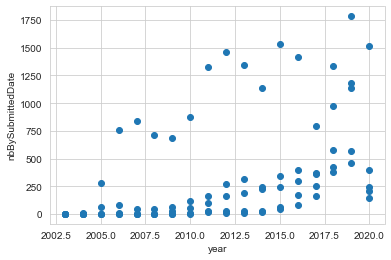

In [35]:
 %matplotlib inline

# Matplotlib Scatter Plot
import matplotlib.pyplot as plt

plt.figure()
plt.scatter('year', 'nbBySubmittedDate',data=dfHal)
plt.xlabel('year')
plt.ylabel('nbBySubmittedDate')
plt.show()

In [20]:
 import seaborn as sns

sns.set_style("whitegrid")

In [ ]:
#!pip install nodejs


In [ ]:
#!pip install ipympl

In [ ]:
#!pip install ipywidgets

In [39]:
%matplotlib ipympl
plt.figure("Submitted over years") 
# graphique sous forme de ligne
sns.lineplot(data=dfHal, x="year", y="nbBySubmittedDate", hue="collectionName", style="collectionName")

#graphique sous forme de point
#sns.scatterplot(data=dfHal, x="year", y="nbBySubmittedDate", hue="collectionName", style="collectionName" )

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

<AxesSubplot:xlabel='year', ylabel='nbBySubmittedDate'>

*Les reviewers demandent le même graphique en N&B, plus grand*

In [40]:
%matplotlib ipympl
fig, ax = plt.subplots()

# the size of A4 paper
fig.set_size_inches(11.7, 8.27)
sns.set_style("whitegrid")
ax.set(xticks=range(2003,2021))

ax.set_title("submitted over years (greyscale)")

fig.set_size_inches(11.7, 8.27)
sns_plot = sns.lineplot(data=dfHal, x="year", y="nbBySubmittedDate", hue="collectionName", style="collectionName", palette="Greys" )

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

 ### Sauvegarder/exporter la figure

In [45]:
sns_plot.figure.savefig(r"C:\Users\germa\Desktop\JupyterLab\sub-years_greyscale.png",dpi=200)

### Compléter les observations proposées

> Que diriez vous d'ajouter la visualisation de la médiane et des quartiles ?

In [46]:
# Ajouter la visualisation en box plot

%matplotlib ipympl
plt.figure("box plot view")
sns.boxplot(data=dfHal, x = "year", y="nbBySubmittedDate")

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

<AxesSubplot:xlabel='year', ylabel='nbBySubmittedDate'>

### On rejette un laboratoire car il a un comportement hors norme

In [47]:
dfHalWihoutXlim = dfHal[dfHal["collectionName"] != "XLIM"]
dfHalWihoutXlim.sample(10)

collectionName  year  nbByProducedDate  nbBySubmittedDate  \
38         FORELL  2005                51                  3   
53         FORELL  2020               191               1520   
50         FORELL  2017               459                249   
28         PPRIME  2013               292                193   
18         PPRIME  2003                 3                  0   
43         FORELL  2010               124                 12   
37         FORELL  2004                50                  0   
66          CERCA  2015               140                 45   
68          CERCA  2017               144                159   
45         FORELL  2012               276                  7   

    nbByReleasedDate  nbByPublicationDate  
38                 3                 53.0  
53              1524                196.0  
50               249                464.0  
28               192                293.0  
18                 0                  3.0  
43                10                125.0  
37                 0                 48.0  
66                45                140.0  
68               159                144.0  
45                 9                266.0

### Vérification

In [48]:
# générer le nouveau graphique
%matplotlib ipympl
plt.figure()
sns.boxplot(data=dfHalWihoutXlim, x = "year", y="nbBySubmittedDate")
plt.figure()
sns.boxplot(data=dfHal, x = "year", y="nbBySubmittedDate")

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

<AxesSubplot:xlabel='year', ylabel='nbBySubmittedDate'>

## Conclusion
Nous remarquons une forte inégalité des dépôts en fonction des laboratoires. Il n'y a pas de conclusion évidente à tirer. Les raisons imaginées sont disciplinaires, le rattachement au CNRS et la présence de personnels dédiés/ressources ayant un impact sur la prise de conscience de l'interêt de déposer sous HAL. L'analyse au niveau établissement de la courbe (bleue) par date de création de notice sous HAL laisse apparaître un cycle d'une période de quatre ans où après un plateau puis maxima local apparaît une chute vers une minimum local qui laisse tout de même sous entrendre effet lié aux période quadriennales des évaluation HCERES. Tandis que la courbe (verte) par date de publication (et non la date de création de la notice sous HAL) montre plutôt une droite croissante sans effet de cycle quadriennal clairement visible.Nous identifions également un phénomène de décroissance importante pour l'année 2020 probablement lié à l'effet de la COVID-19 comme un facteur ayant vraissemblablement impacté le temps dédié à la recherche et la publication au profit d'une gestion des urgences liées aux difficultées d'enseignements.

##  Annexe

####  Visualisation

In [ ]:
%matplotlib ipympl

dfHalUP = pd.read_csv(fileDataUP)

fig, ax = plt.subplots()

# the size of A4 paper
fig.set_size_inches(11.7, 8.27)
sns.set_style("whitegrid")
ax.set(xticks=range(2003,2021))
ax.set_title('HAL UP over years')
sns.lineplot(data=dfHalUP, x="year", y="nbByProducedDate", color="green", label="produced", ax=ax)
sns.lineplot(data=dfHalUP, x="year", y="nbByReleasedDate", color="blue", label="released", ax=ax)
sns.scatterplot(data=dfHalUP, x="year", y="nbByProducedDate", color="green", ax=ax)
p = sns.scatterplot(data=dfHalUP, x="year", y="nbByReleasedDate", color="blue", ax=ax)

In [ ]:
#p.figure.savefig("./../data/graphic/UP-years_colors.png",dpi=200)

#### Code d'intégration d'un script  python externe au notebook

In [ ]:
# The sys module provides functions and variables used to manipulate different parts of the Python runtime environment
# The OS module in Python provides a way of using operating system dependent functionality. The functions that the OS module provides allows you to interface with the underlying operating system that Python is running on – be that Windows, Mac or Linux

import sys
import os

sys.path.insert(0, os.path.abspath('./../code/'))
import computeData as cptd

listLabs = ["UNIV-POITIERS"]
listYears = range(2003,2021)
fileDataUP = https://api.archives-ouvertes.fr/docs/search/?schema=field-types#field-types"
cptd.listCollectionToCSV(listLabs, listYears, fileDataUP)

## Print dependencies
### Dependences are fundamental to record the computation environnement
Use watermark to print version of python, ipython, packages, and characteristics of the computer

In [3]:
# pip install watermark

Note: you may need to restart the kernel to use updated packages.


In [14]:
# wget is a package to dowload files
#!pip install wget

  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9686 sha256=87261f526df2d8025f7709b98bb8d2ea2eadd4cda12e58ccff43adfc23b3bf6d
  Stored in directory: c:\users\germa\appdata\local\pip\cache\wheels\bd\a8\c3\3cf2c14a1837a4e04bd98631724e81f33f462d86a1d895fae0
Successfully built wget


In [15]:
%load_ext watermark

# Python, ipython, packages, and amchine characteristics

%watermark -v -m -p wget,pandas,numpy,watermark,seaborn,requests,ipywidgets,openpyxl,matplotlib,sys,os

# data

print(" ")
%watermark -u -n -t -z

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
Python implementation: CPython
Python version       : 3.8.5
IPython version      : 7.19.0

wget      : 3.2
pandas    : 1.1.3
numpy     : 1.19.2
watermark : 2.1.0
seaborn   : 0.11.0
requests  : 2.24.0
ipywidgets: 7.5.1
openpyxl  : 3.0.5
matplotlib: 3.3.2
sys       : 3.8.5 (default, Sep  3 2020, 21:29:08) [MSC v.1916 64 bit (AMD64)]
os        : unknown

Compiler    : MSC v.1916 64 bit (AMD64)
OS          : Windows
Release     : 10
Machine     : AMD64
Processor   : Intel64 Family 6 Model 165 Stepping 3, GenuineIntel
CPU cores   : 12
Architecture: 64bit

 
Last updated: Sat Dec 19 2020 12:42:44Paris, Madrid

